In [16]:
import json
import pandas as pd

# Load JSON file
data = []
with open("data/Sarcasm_Headlines_Dataset_v2.json", "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line.strip()))  # Load each line separately

df = pd.DataFrame(data)

df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [18]:
df.describe(include="all")

,is_sarcastic,headline,article_link
count,28619.000000,28619,28619
unique,NaN,28503,28617
top,NaN,"'no way to prevent this,' says only nation whe...",https://politics.theonion.com/nation-not-sure-...
freq,NaN,12,2
mean,0.476397,NaN,NaN
std,0.499451,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


- Duplicates exist


In [19]:
df = df.drop_duplicates()

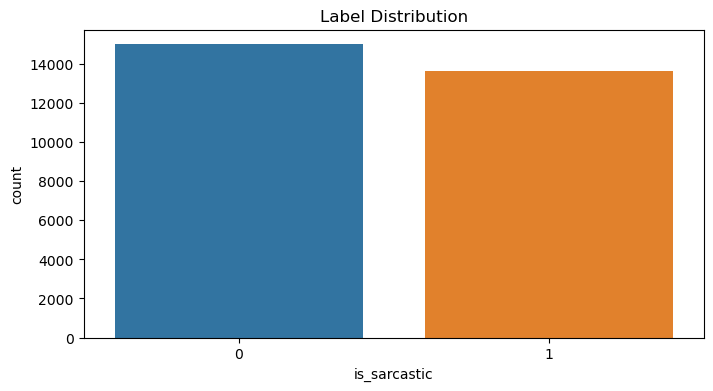

0    14984
1    13633
Name: is_sarcastic, dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="is_sarcastic", order=df["is_sarcastic"].value_counts().index)
plt.title("Label Distribution")
plt.show()
print(df["is_sarcastic"].value_counts())

count    28617.000000
mean        10.050145
std          3.388232
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max        151.000000
Name: headline_length, dtype: float64


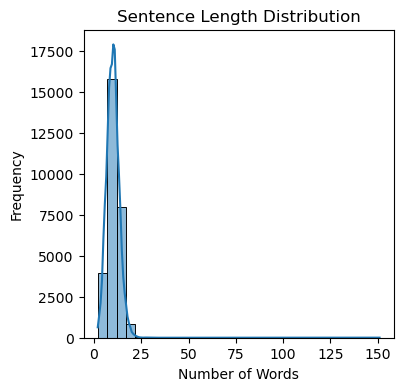

In [21]:
df["headline_length"] = df["headline"].apply(lambda x: len(x.split()))

# Summary statistics
print(df["headline_length"].describe())

# print(df[df["headline_length"] == 151])

# df = df[df["headline_length"] < 151]

df["headline_length"].value_counts()
# Histogram of sentence lengths
plt.figure(figsize=(4, 4))
sns.histplot(df["headline_length"], bins=30, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raygu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('new', 1637), ('man', 1351), ('trump', 1284), ('one', 527), ('area', 494), ('woman', 483), ('says', 482), ('donald', 472), ('day', 435), ('like', 428), ('get', 422), ('first', 421), ('time', 417), ('people', 370), ('still', 363), ('house', 362), ('white', 349), ('make', 346), ('life', 340), ('obama', 331)]
23780


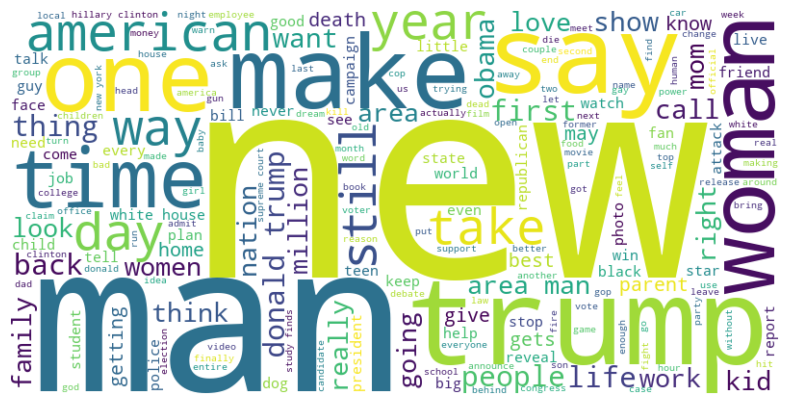

In [22]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Combine all sentences
all_words = " ".join(df["headline"]).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Most common words
word_freq = Counter(filtered_words)
print(word_freq.most_common(20))
print(len(word_freq))

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raygu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('man', 1143), ('new', 973), ('area', 487), ('woman', 353), ('trump', 327), ('one', 292), ('time', 261), ('day', 251), ('still', 245), ('like', 233), ('nation', 228), ('get', 224), ('finds', 210), ('back', 208), ('first', 201), ('house', 200), ('americans', 192), ('family', 189), ('white', 179), ('life', 178), ('going', 174), ('would', 165), ('last', 165), ('obama', 163), ('people', 162), ('local', 157), ('study', 155), ('every', 146), ('little', 142), ('way', 138), ('make', 137), ('good', 137), ('says', 136), ('announces', 134), ('getting', 132), ('guy', 130), ('really', 129), ('work', 128), ('school', 128), ('could', 127), ('home', 127), ('mom', 126), ('child', 126), ('years', 126), ('around', 125), ('clinton', 120), ('party', 117), ('never', 116), ('campaign', 115), ('american', 114)]
17515


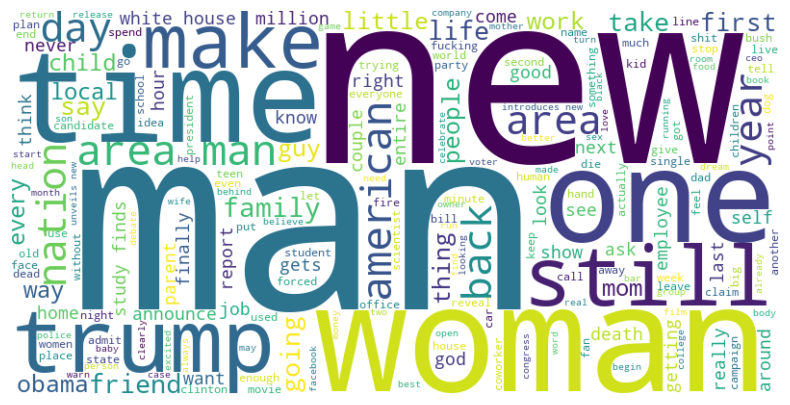

In [28]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Combine all sentences
sarcastic_words = " ".join(df[df["is_sarcastic"] == 1]["headline"]).lower().split()
filtered_words = [word for word in sarcastic_words if word.isalpha() and word not in stop_words]

# Most common words
word_freq = Counter(filtered_words)
print(word_freq.most_common(50))
print(len(word_freq))

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raygu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('trump', 957), ('new', 664), ('donald', 453), ('says', 346), ('women', 240), ('one', 234), ('first', 220), ('make', 209), ('people', 208), ('man', 208), ('get', 198), ('like', 195), ('gop', 192), ('day', 184), ('could', 183), ('black', 180), ('white', 170), ('need', 170), ('world', 169), ('clinton', 168), ('police', 168), ('obama', 168), ('life', 162), ('house', 162), ('health', 162), ('bill', 161), ('hillary', 157), ('best', 157), ('time', 156), ('know', 149), ('things', 145), ('say', 144), ('may', 141), ('way', 138), ('love', 136), ('president', 135), ('watch', 135), ('woman', 130), ('want', 129), ('kids', 128), ('video', 127), ('calls', 124), ('change', 121), ('still', 118), ('really', 116), ('years', 115), ('big', 115), ('death', 115), ('back', 115), ('show', 114)]
15355


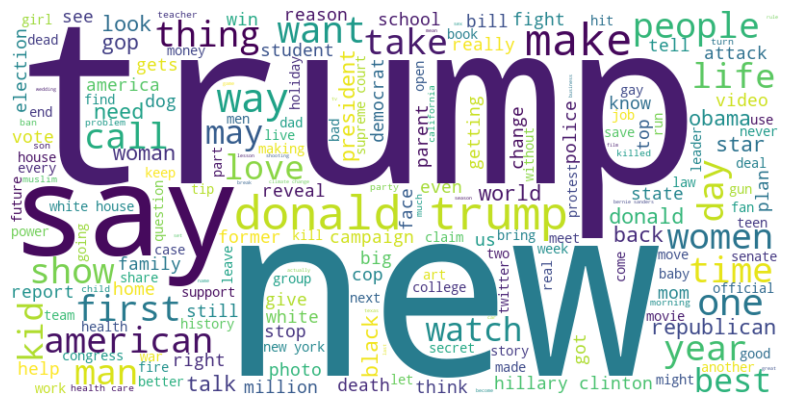

In [29]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Combine all sentences
non_sarcastic_words = " ".join(df[df["is_sarcastic"] == 0]["headline"]).lower().split()
filtered_words = [word for word in non_sarcastic_words if word.isalpha() and word not in stop_words]

# Most common words
word_freq = Counter(filtered_words)
print(word_freq.most_common(50))
print(len(word_freq))

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [25]:
import re

def check_special_chars(sentence):
    return bool(re.search(r"[^a-zA-Z0-9\s.,!?:;&']", sentence))

df["has_special_chars"] = df["headline"].apply(check_special_chars)

# Check number of sentences with special characters
print(df["has_special_chars"].value_counts())


False    23572
True      5045
Name: has_special_chars, dtype: int64


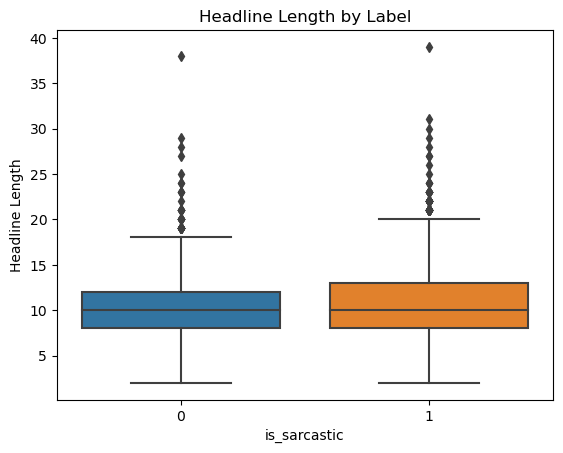

In [27]:
# Group by label and analyze sentence length
df.groupby('is_sarcastic')['headline_length'].describe()

df = df[df["headline_length"] < 151]

# Plot sentence length by label
sns.boxplot(x='is_sarcastic', y='headline_length', data=df)
plt.title('Headline Length by Label')
plt.xlabel('is_sarcastic')
plt.ylabel('Headline Length')
plt.show()